# AI ODYSSSEY: CNN ASSIGNMENT

## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### FILTERS

Filters are the most unique part of a CNN. They make the bulk of the convolutional layers of a CNN, and thus differentiate it from a normal neural network.

**Describe the following filters:**
- averaging filter:
- gaussian filter:
- median filter:
- unsharp masking:
- prewitt filter:
- sobel filter:
- laplacian filter:

**Now give an example of application of each of these filters. You are required to load an image of your choice. Then, apply these filters to those images and display the image before and after convolution.**


In [1]:
from matplotlib import pyplot as plt
import cv2
from imutils import paths
import numpy as np



**Averaging Filter**

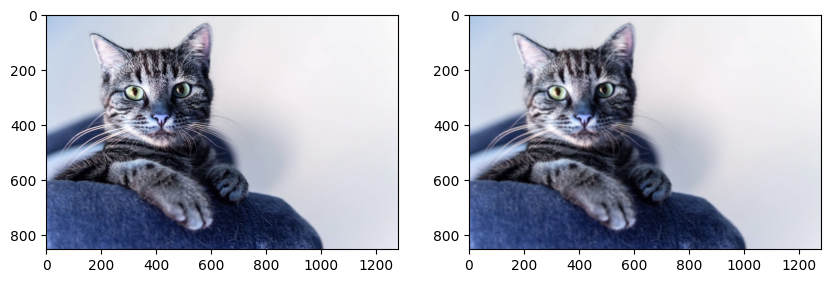

In [49]:
#ENTER YOUR CODE HERE

image=cv2.imread('cat.jpg')

fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image)

kernel = np.ones((5, 5), np.float32) / 25
average=cv2.filter2D(image, -1, kernel)

plt.subplot(1,2,2)
plt.imshow(average)

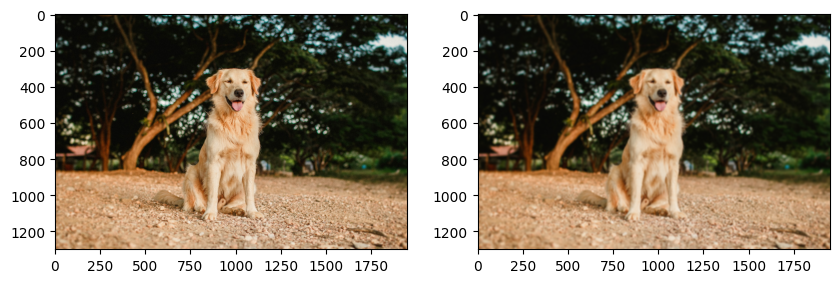

**Gaussian Filter**

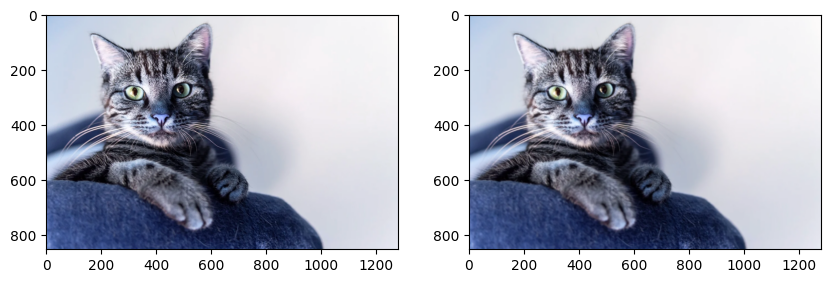

In [5]:
#ENTER YOUR CODE HERE
fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image)

gaussian=cv2.GaussianBlur(image, (5, 5), 0)

plt.subplot(1,2,2)
plt.imshow(gaussian)

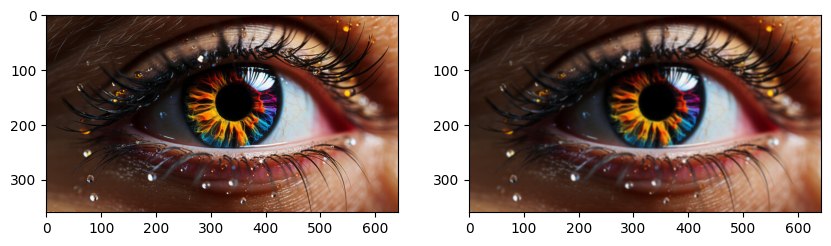

**Median Filter**

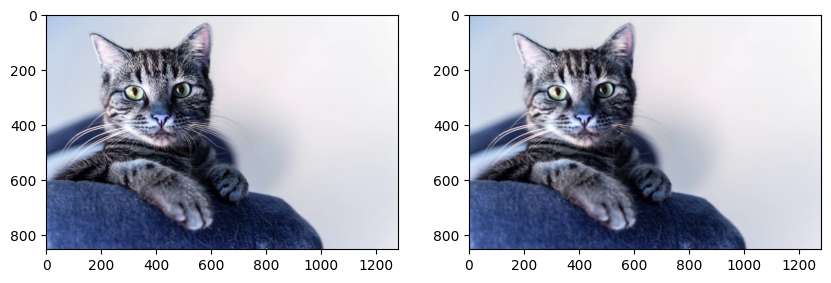

In [6]:
#ENTER YOUR CODE HERE
fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image)

median=cv2.medianBlur(image, 5)
plt.subplot(1,2,2)
plt.imshow(median)

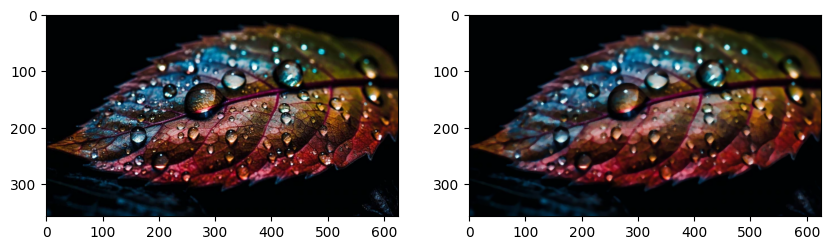

The nice images were for fun.

**Blurring is actually used for noise removal. Demonstrate.**

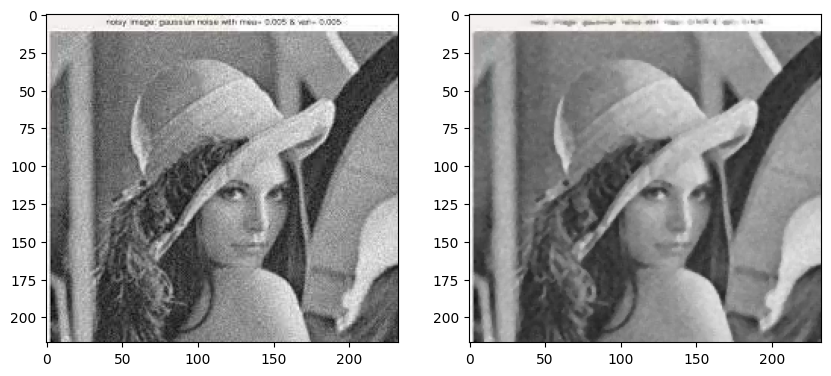

In [22]:
#ENTER YOUR CODE HERE
image1=cv2.imread('noise.jpeg')
fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image1)

median=cv2.medianBlur(image1, 3)
plt.subplot(1,2,2)
plt.imshow(median)

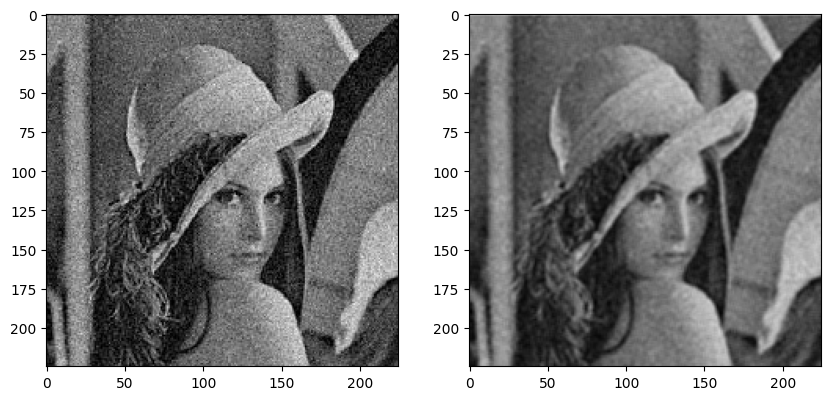

**Unsharp Masking**

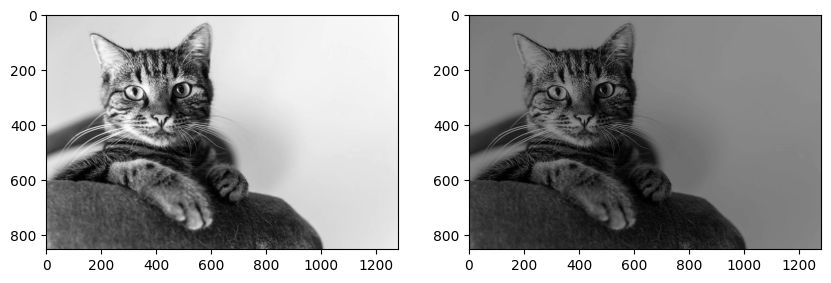

In [55]:
#ENTER YOUR CODE HERE
# image=cv2.imread('blur.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(gray_image,cmap='gray')

blurred = cv2.GaussianBlur(gray_image, (3, 3), 0)
unsharp_image = cv2.addWeighted(gray_image, 1.5, blurred, -1, 0)

plt.subplot(1,2,2)
plt.imshow(unsharp_image,cmap='gray')

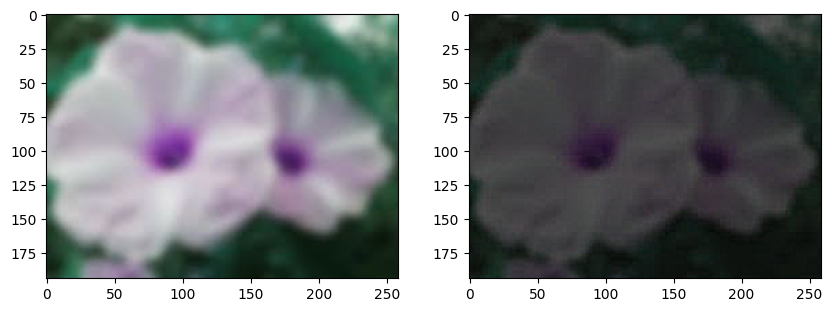

**Prewitt Horizontal Filter**

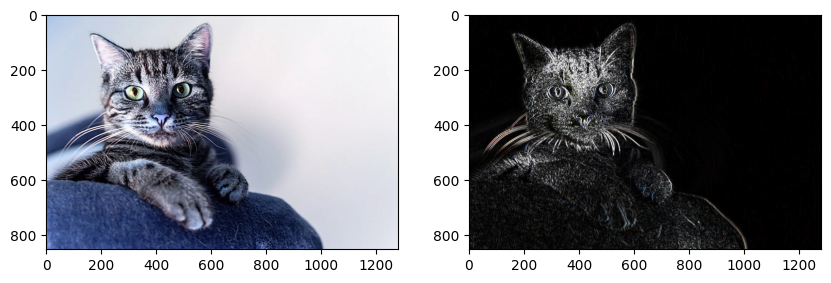

In [41]:
#ENTER YOUR CODE HERE

fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image)

kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
x = cv2.filter2D(image, cv2.CV_16S, kernelx)
absX = cv2.convertScaleAbs(x)

plt.subplot(1,2,2)
plt.imshow(absX)

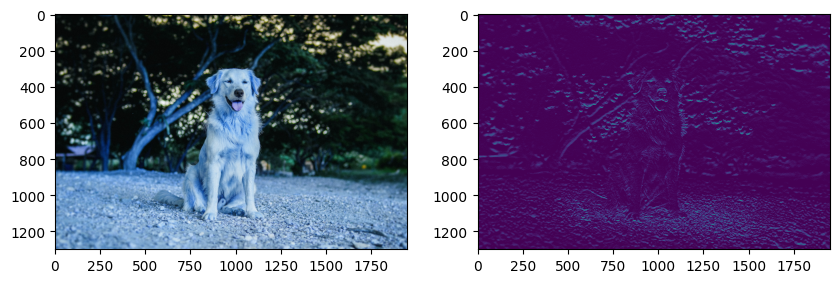

**Prewitt Vertical Filter**

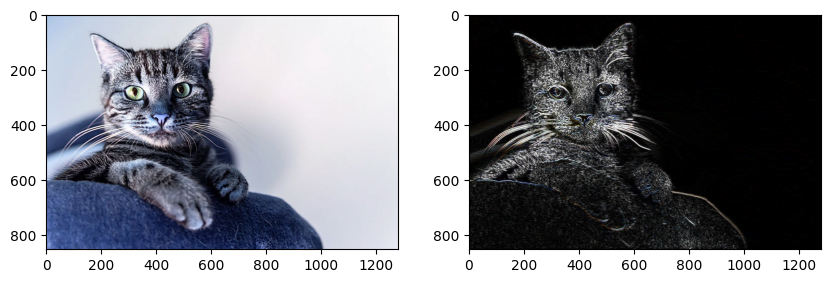

In [40]:
#ENTER YOUR CODE HERE
fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image)

kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
y = cv2.filter2D(image, cv2.CV_16S, kernely)
absY = cv2.convertScaleAbs(y)

plt.subplot(1,2,2)
plt.imshow(absY)

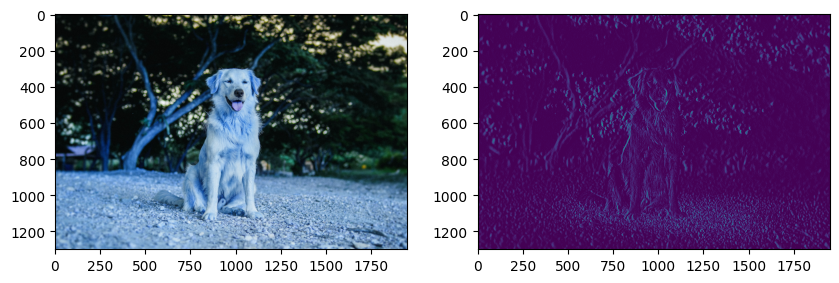

**Combined Prewitt**

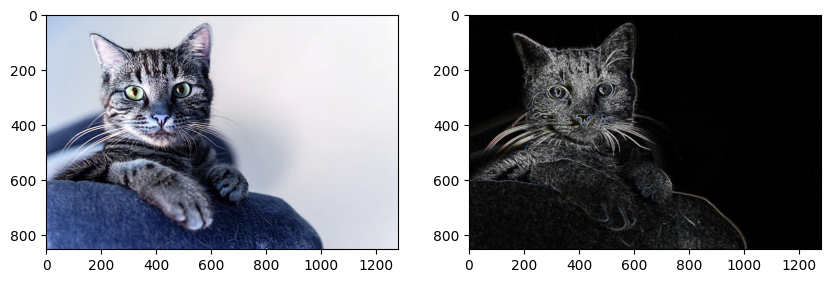

In [35]:
#ENTER YOUR CODE HERE
fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image)

kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
x = cv2.filter2D(image, cv2.CV_16S, kernelx)
y = cv2.filter2D(image, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
prewitt=cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.subplot(1,2,2)
plt.imshow(prewitt)

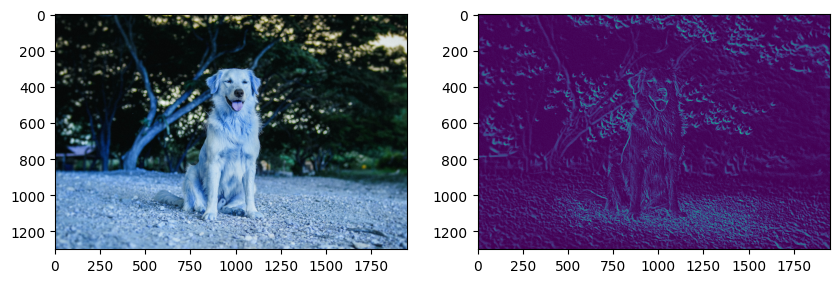

**Sobel Filter**

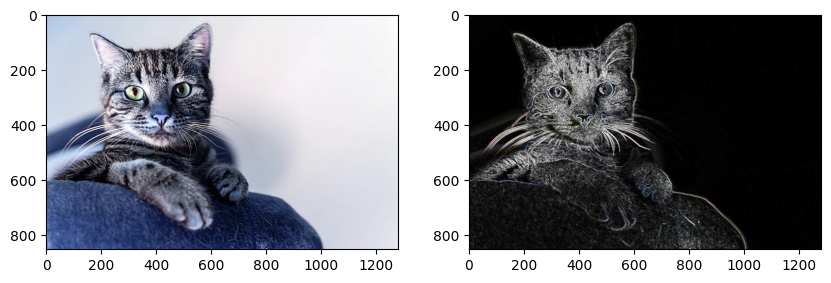

In [36]:
#ENTER YOUR CODE HERE
fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image)

x = cv2.Sobel(image, cv2.CV_16S, 1, 0, ksize=3)
y = cv2.Sobel(image, cv2.CV_16S, 0, 1, ksize=3)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
sobel= cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.subplot(1,2,2)
plt.imshow(sobel)

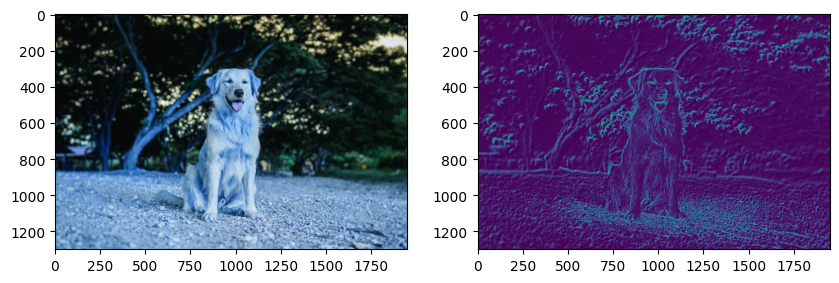

As you can see, the quality of sobel filter is better than that of combined prewitt.

**Laplacian Filter**

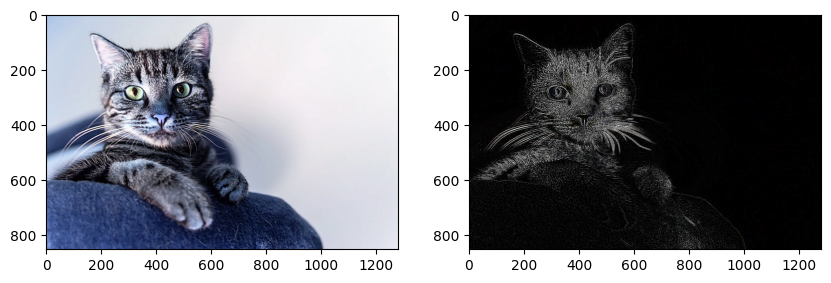

In [38]:
#ENTER YOUR CODE HERE
fig = plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.imshow(image)

lap=cv2.Laplacian(image, cv2.CV_16S, ksize=3)

plt.subplot(1,2,2)
plt.imshow(lap)

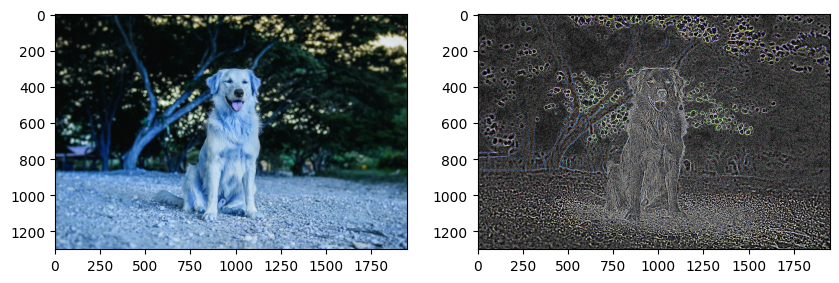

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**What is the no. of elements in the training and testing datasets?**

In [3]:
#ENTER YOUR CODE HERE
print("No. of elements in training dataset: ",X_train.shape[0])
print("No. of elements in testing dataset: ",X_test.shape[0])


No. of elements in training dataset:  60000
No. of elements in testing dataset:  10000


No. of elements in training dataset: 60000
No. of elements in testing dataset: 10000


**What are the labels in the dataset?**

In [4]:
#ENTER YOUR CODE HERE
np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Visualise one image for each label.**

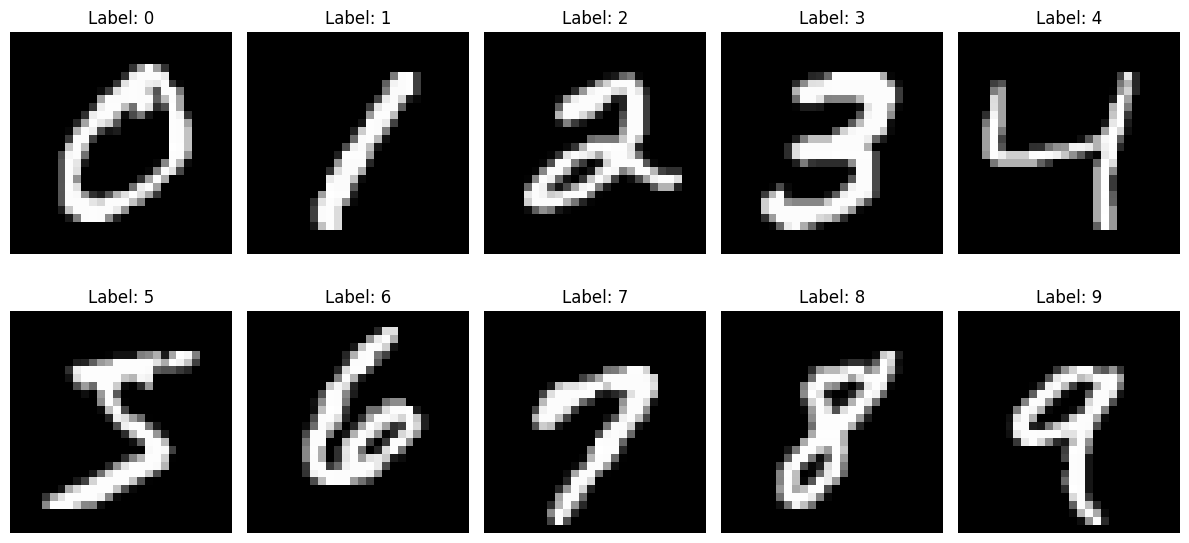

In [5]:
#ENTER YOUR CODE HERE

fig, axs = plt.subplots(2, 5, figsize=(12, 6))
axs = axs.ravel()

for i in range(10):
    for img, label in zip(X_train, y_train):
        if label == i:
            axs[i].imshow(img, cmap='gray')
            axs[i].set_title(f'Label: {label}')
            axs[i].axis('off')
            break

plt.tight_layout()
plt.show()

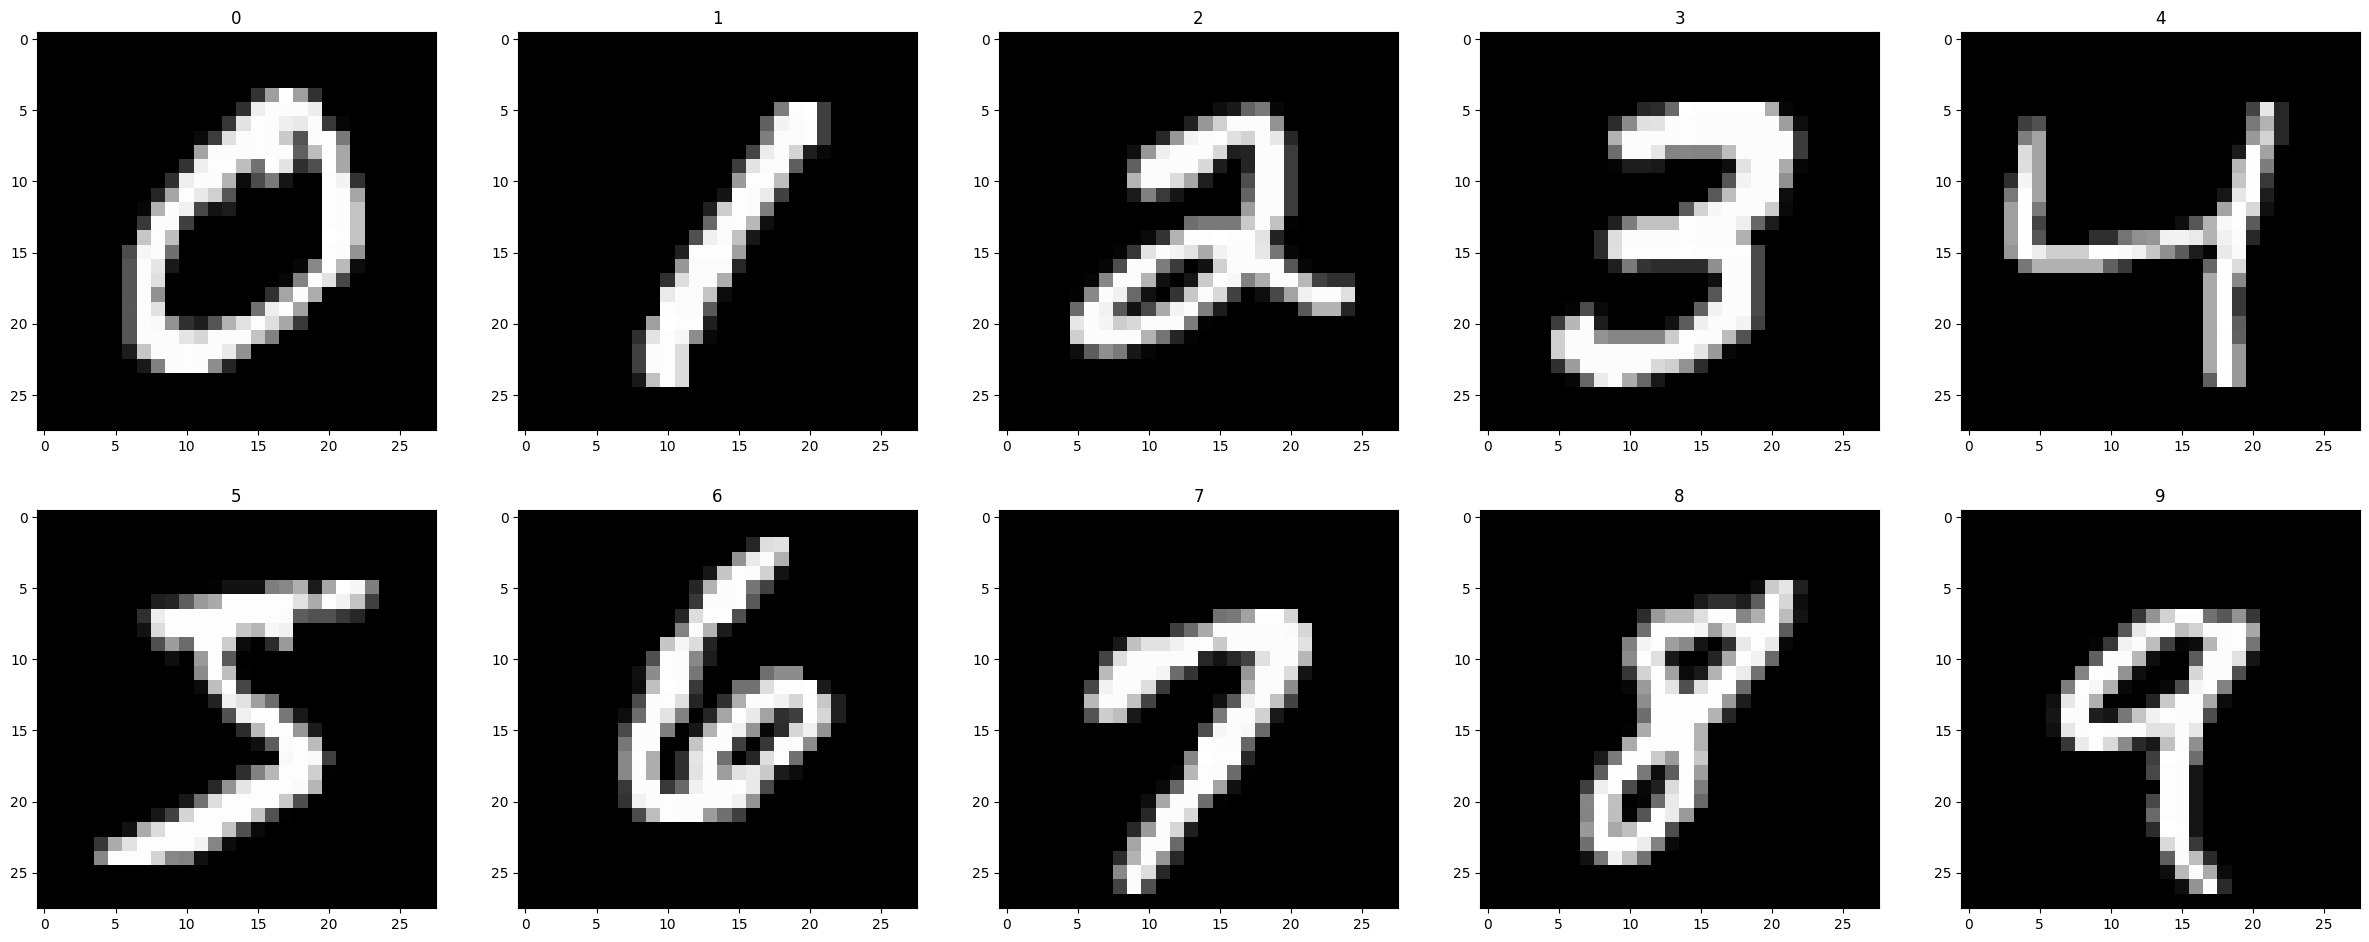

**One-hot encode the y labels.**

In [6]:
#ENTER YOUR CODE HERE
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

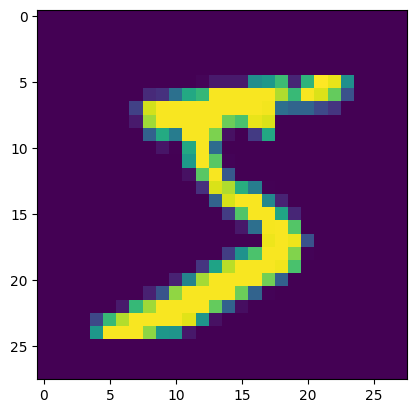

In [7]:
#ENTER YOUR CODE HERE
print(X_train[0])
plt.imshow(X_train[0])

The shape of each element is: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

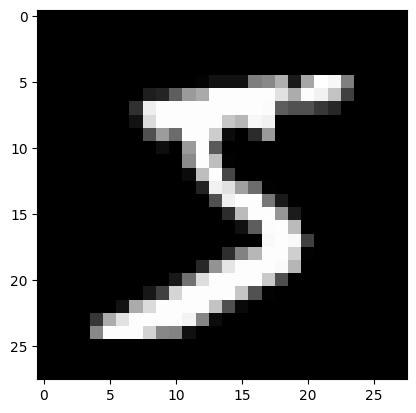

**Change the dimension of the training and testing datasets for it to become a 3D one. Remember this is a grayscale image.**

In [8]:
#ENTER YOUR CODE HERE
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [9]:
#ENTER YOUR CODE HERE
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.**

In [10]:
#ENTER YOUR CODE HERE
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [11]:
#ENTER YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Now split the dataset into a validation part.**

In [12]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=40)

**Fit the model and plot the training history.**

In [13]:
#ENTER YOUR CODE HERE
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1652 - accuracy: 0.9511 - val_loss: 0.0682 - val_accuracy: 0.9782
Epoch 2/5
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0524 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 55s 36ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0434 - val_accuracy: 0.9877
Epoch 4/5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0269 - accuracy: 0.9909 - val_loss: 0.0361 - val_accuracy: 0.9900
Epoch 5/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0383 - val_accuracy: 0.9896


Epoch 1/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0608 - val_accuracy: 0.9815
Epoch 2/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0514 - val_accuracy: 0.9851
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0550 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0494 - val_accuracy: 0.9862
Epoch 6/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 7/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0377 -

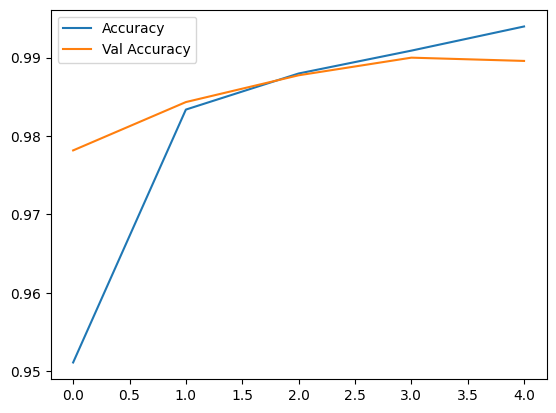

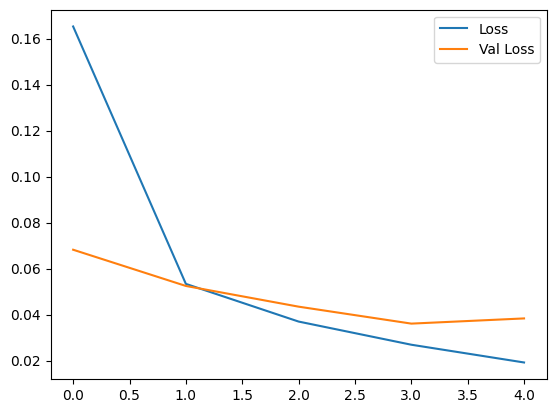

In [14]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

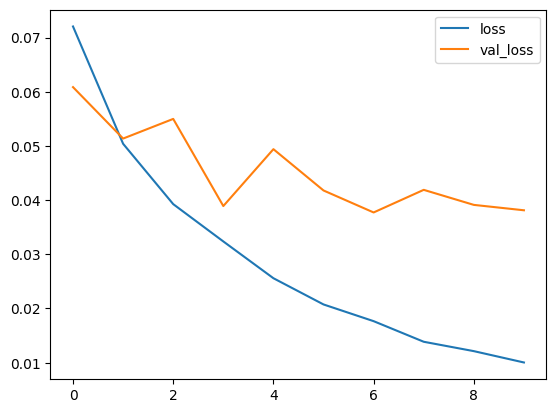

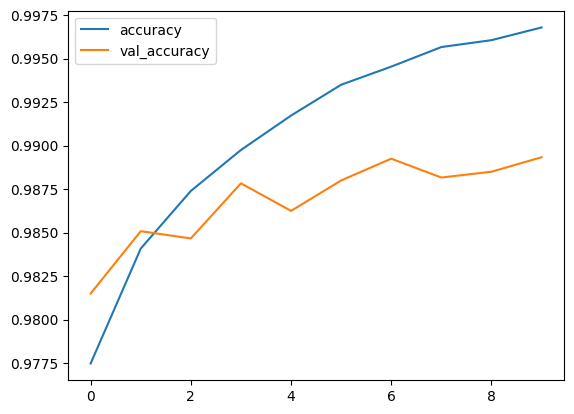

**Now test your model on the training dataset and print the classification matrix.**

In [17]:
#ENTER YOUR CODE HERE
from sklearn.metrics import classification_report

pred = model.predict(X_test)
y_pred = tf.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

313/313 [==============================] - 5s 16ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

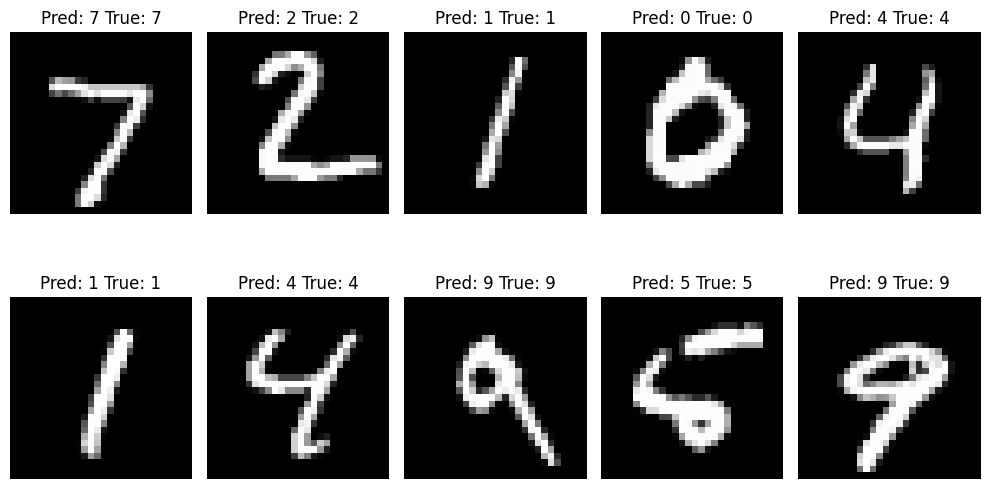

In [20]:
#ENTER YOUR CODE HERE

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = y_pred[i]
    true_label = y_true[i]
    plt.title(f'Pred: {predicted_label} True: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

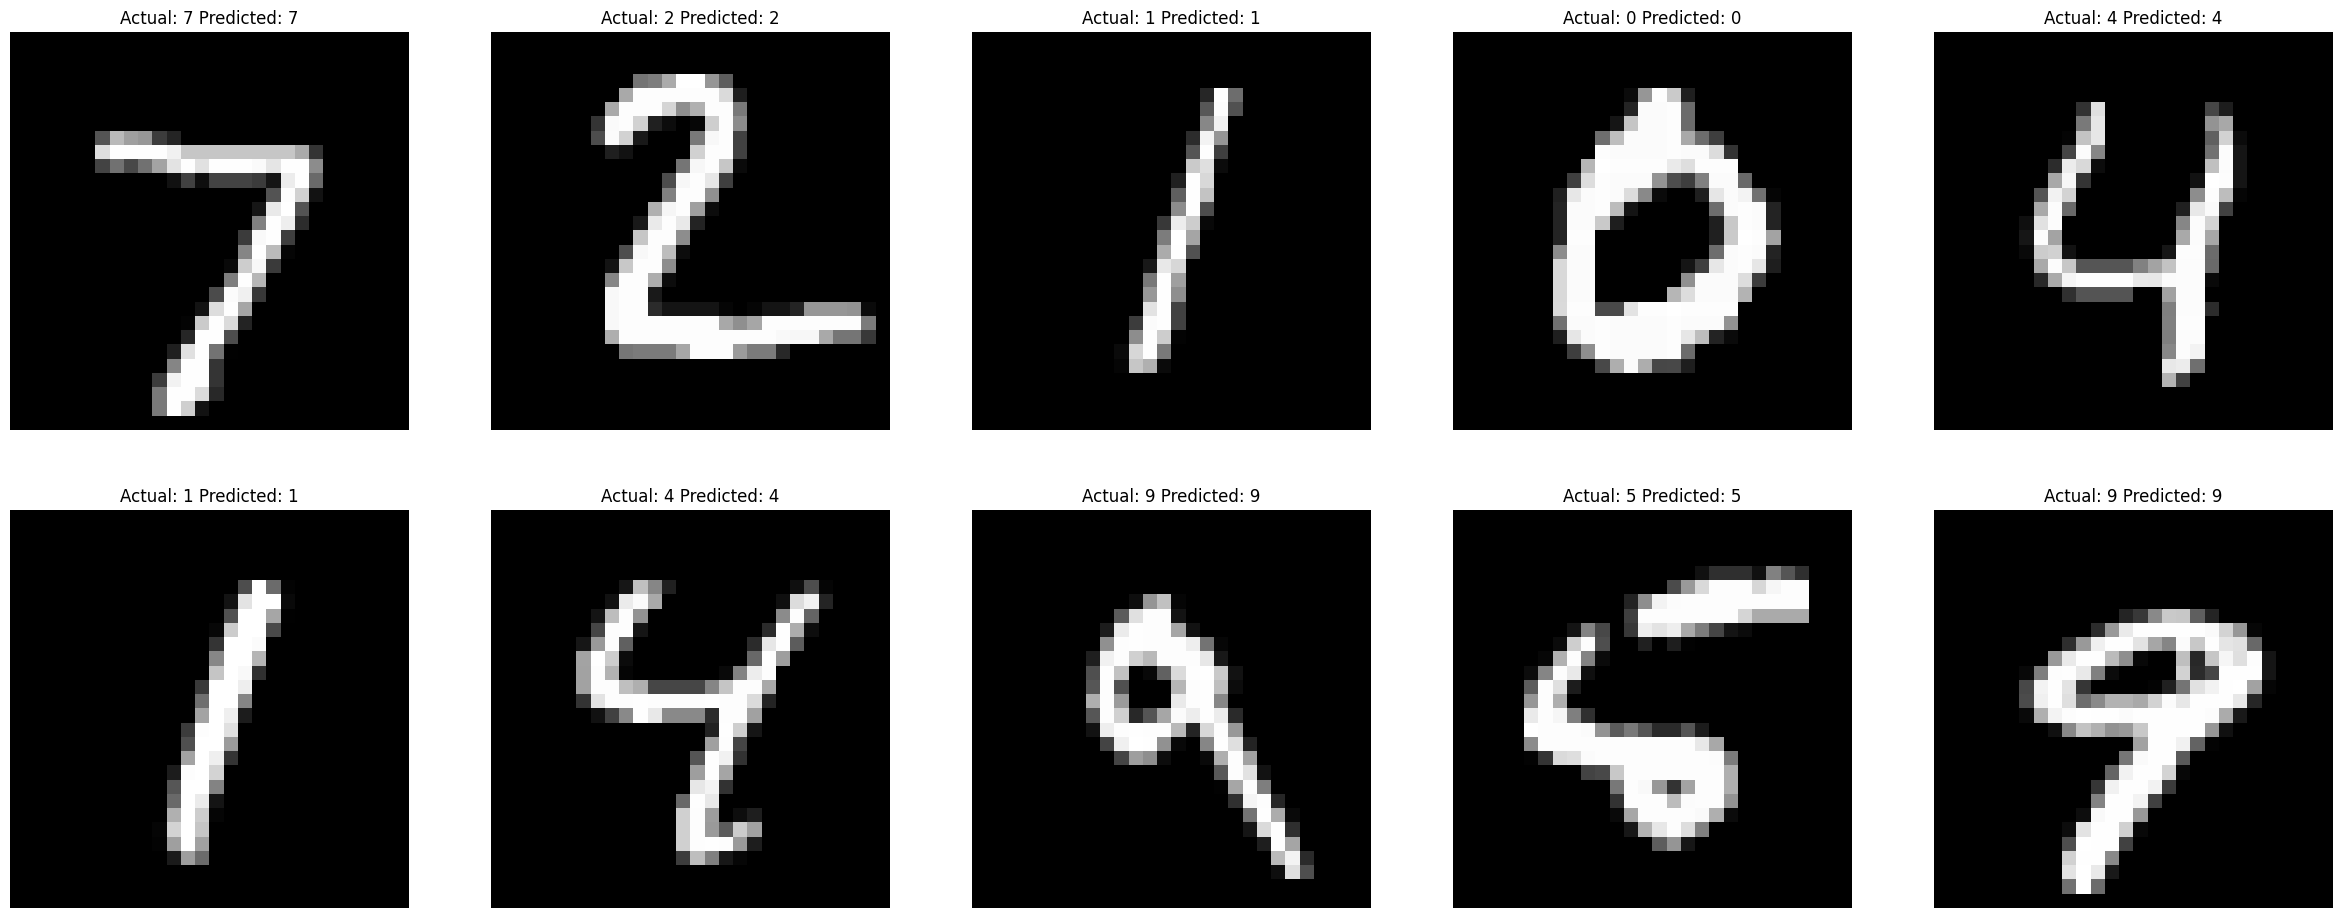

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

In [24]:
#ENTER YOUR CODE HERE


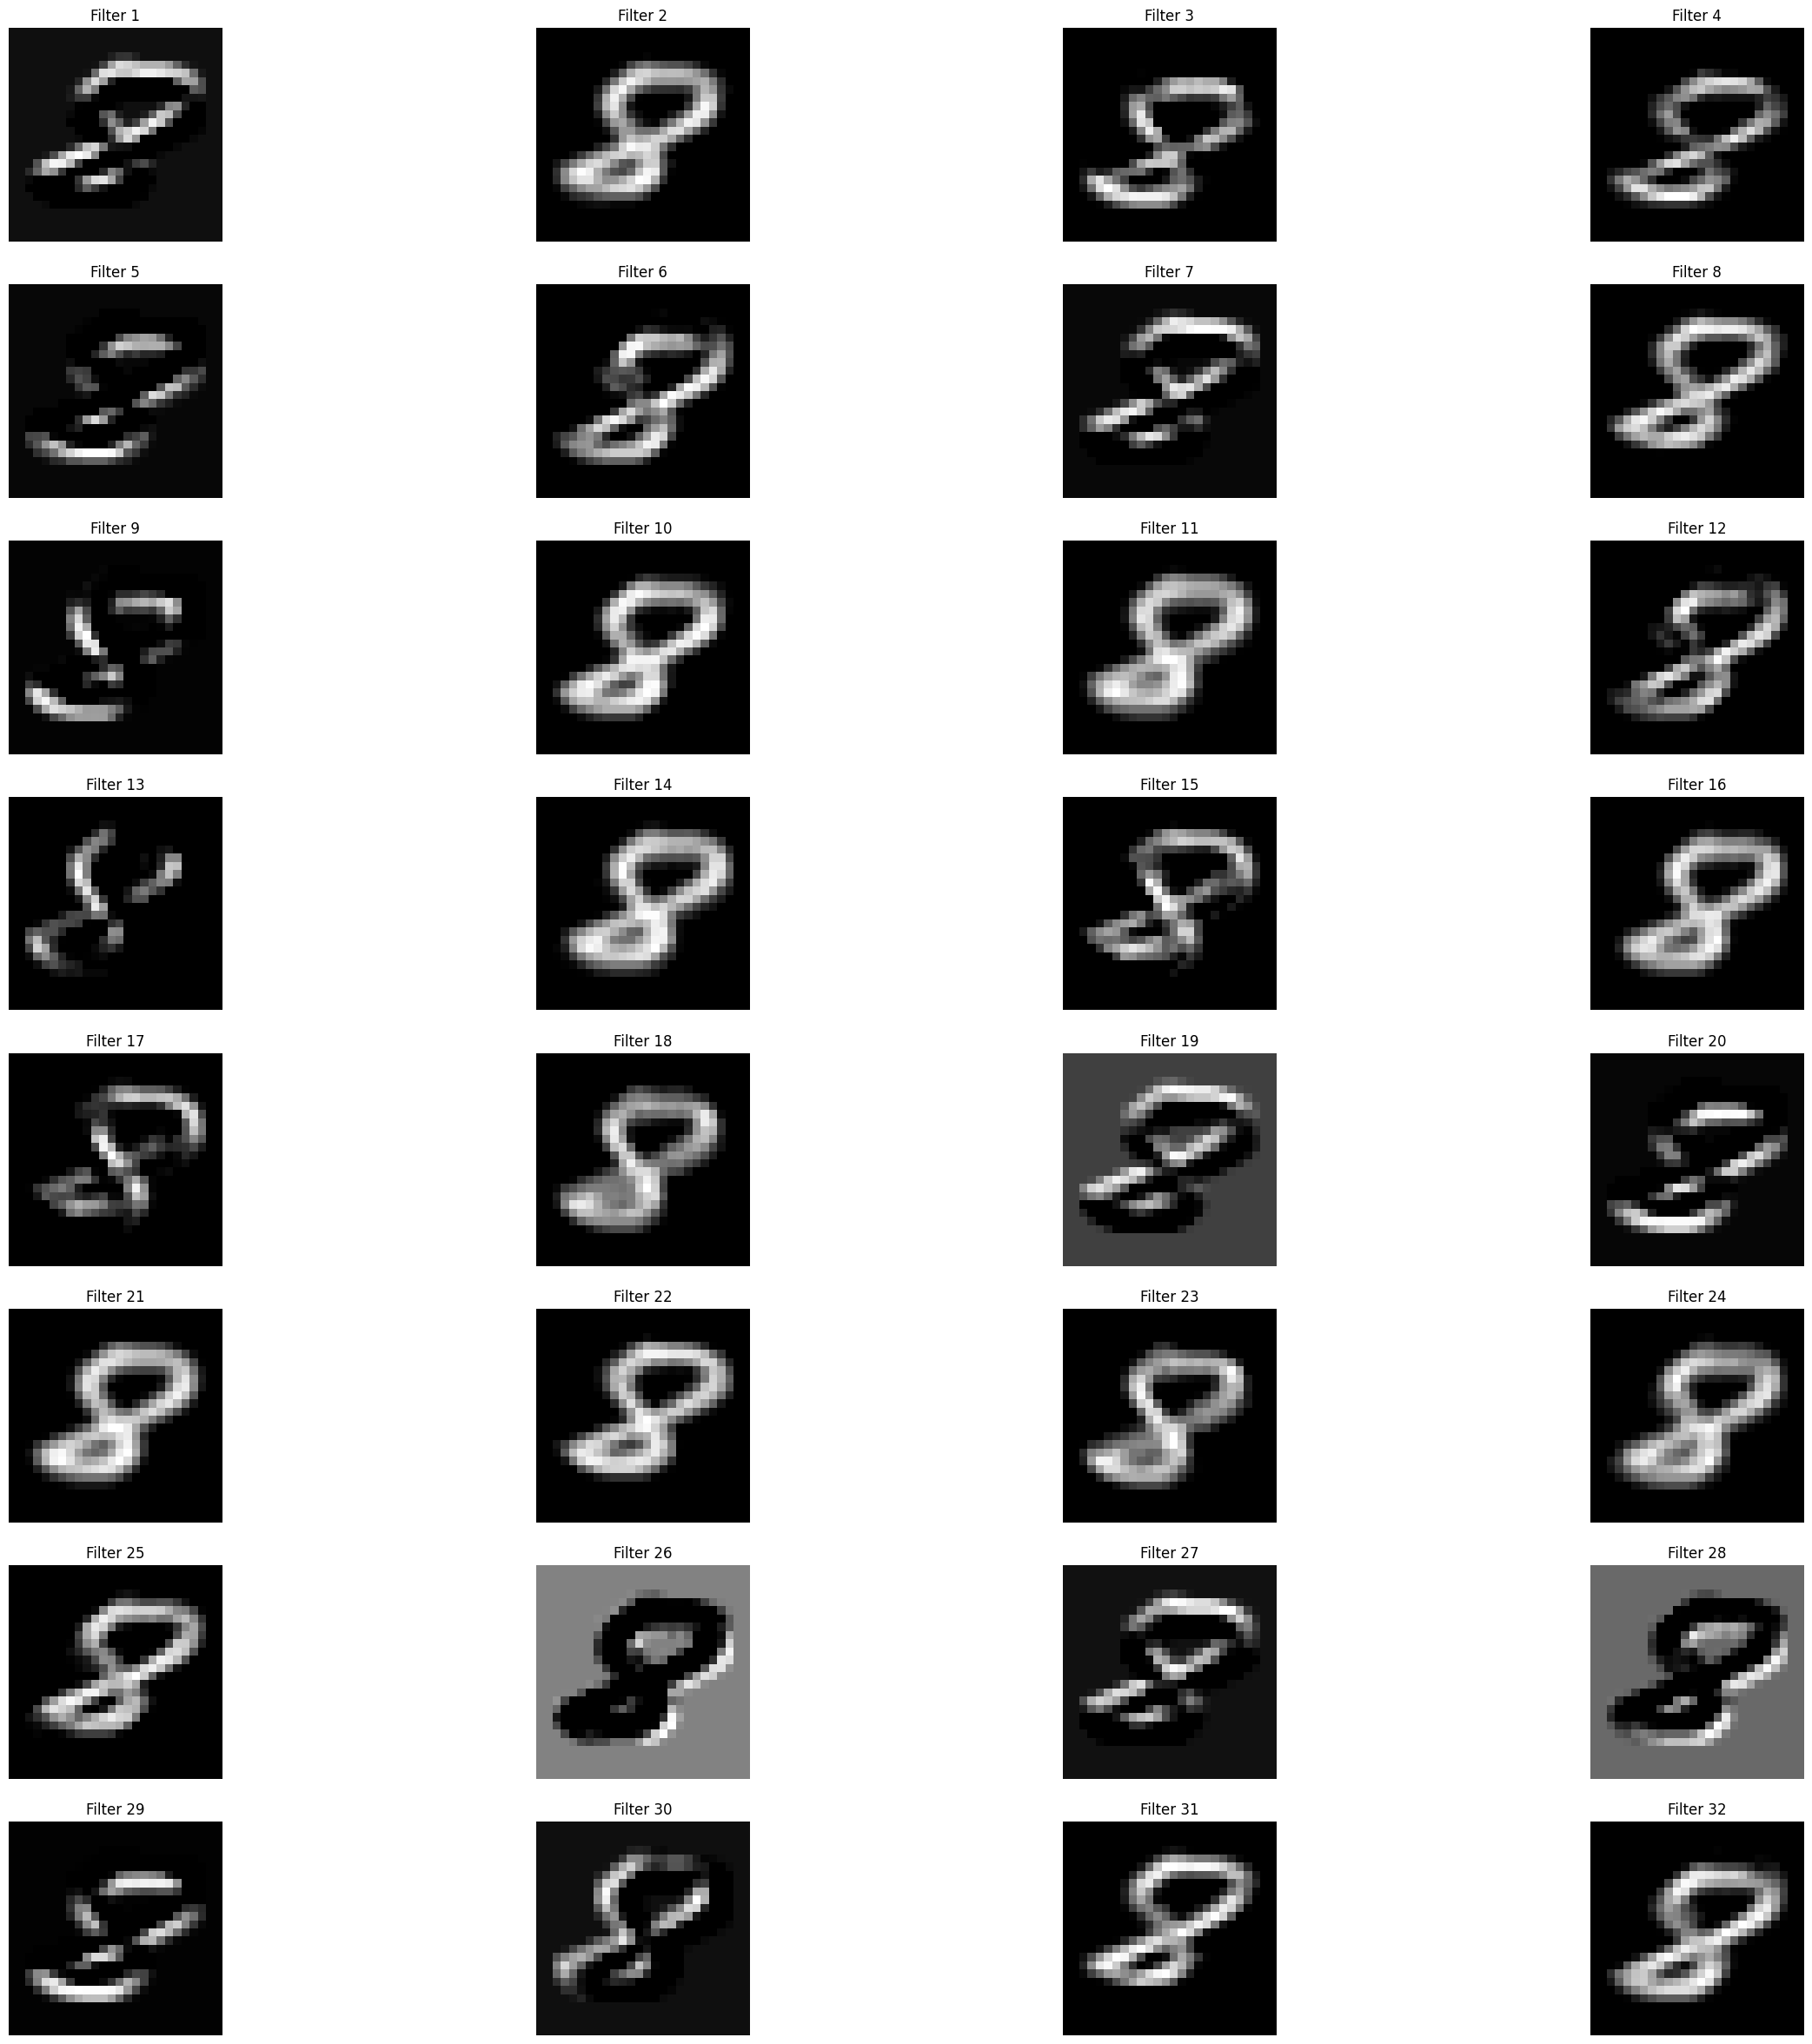

**Do the same for the output of the max pooling layer.**

In [ ]:
#ENTER YOUR CODE HERE

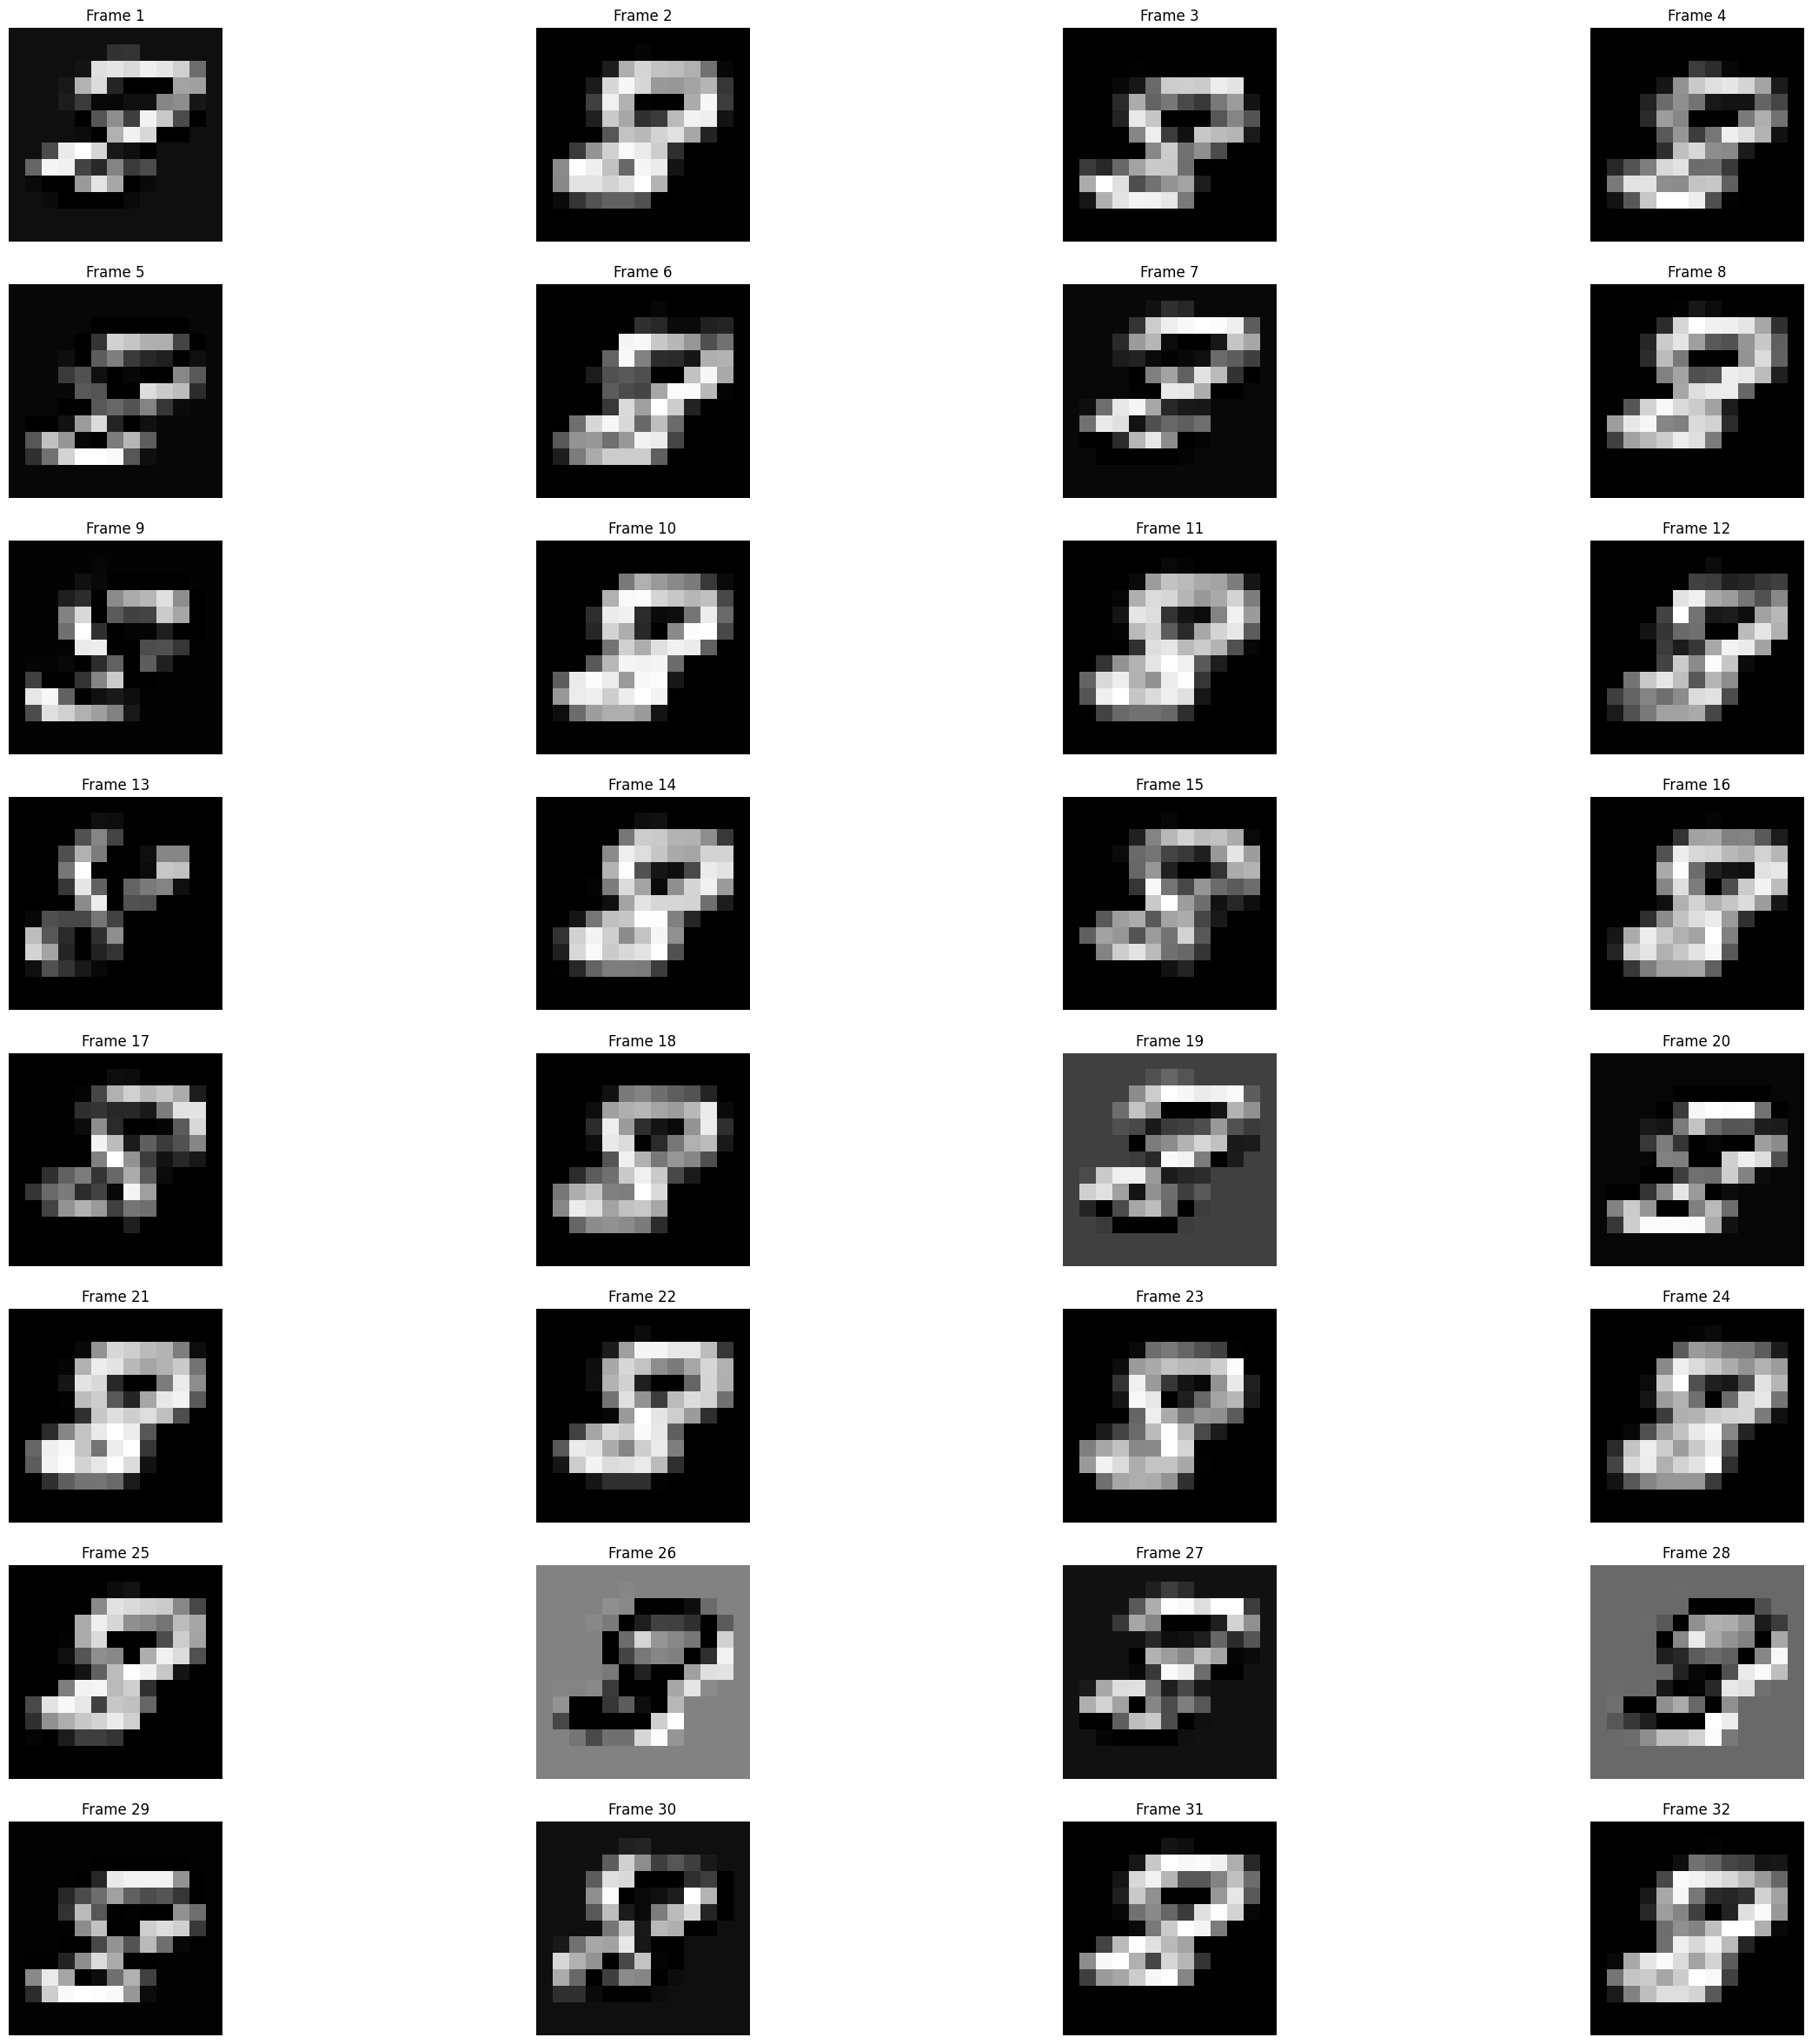

**Output of the third convolution layer.**

In [ ]:
#ENTER YOUR CODE HERE

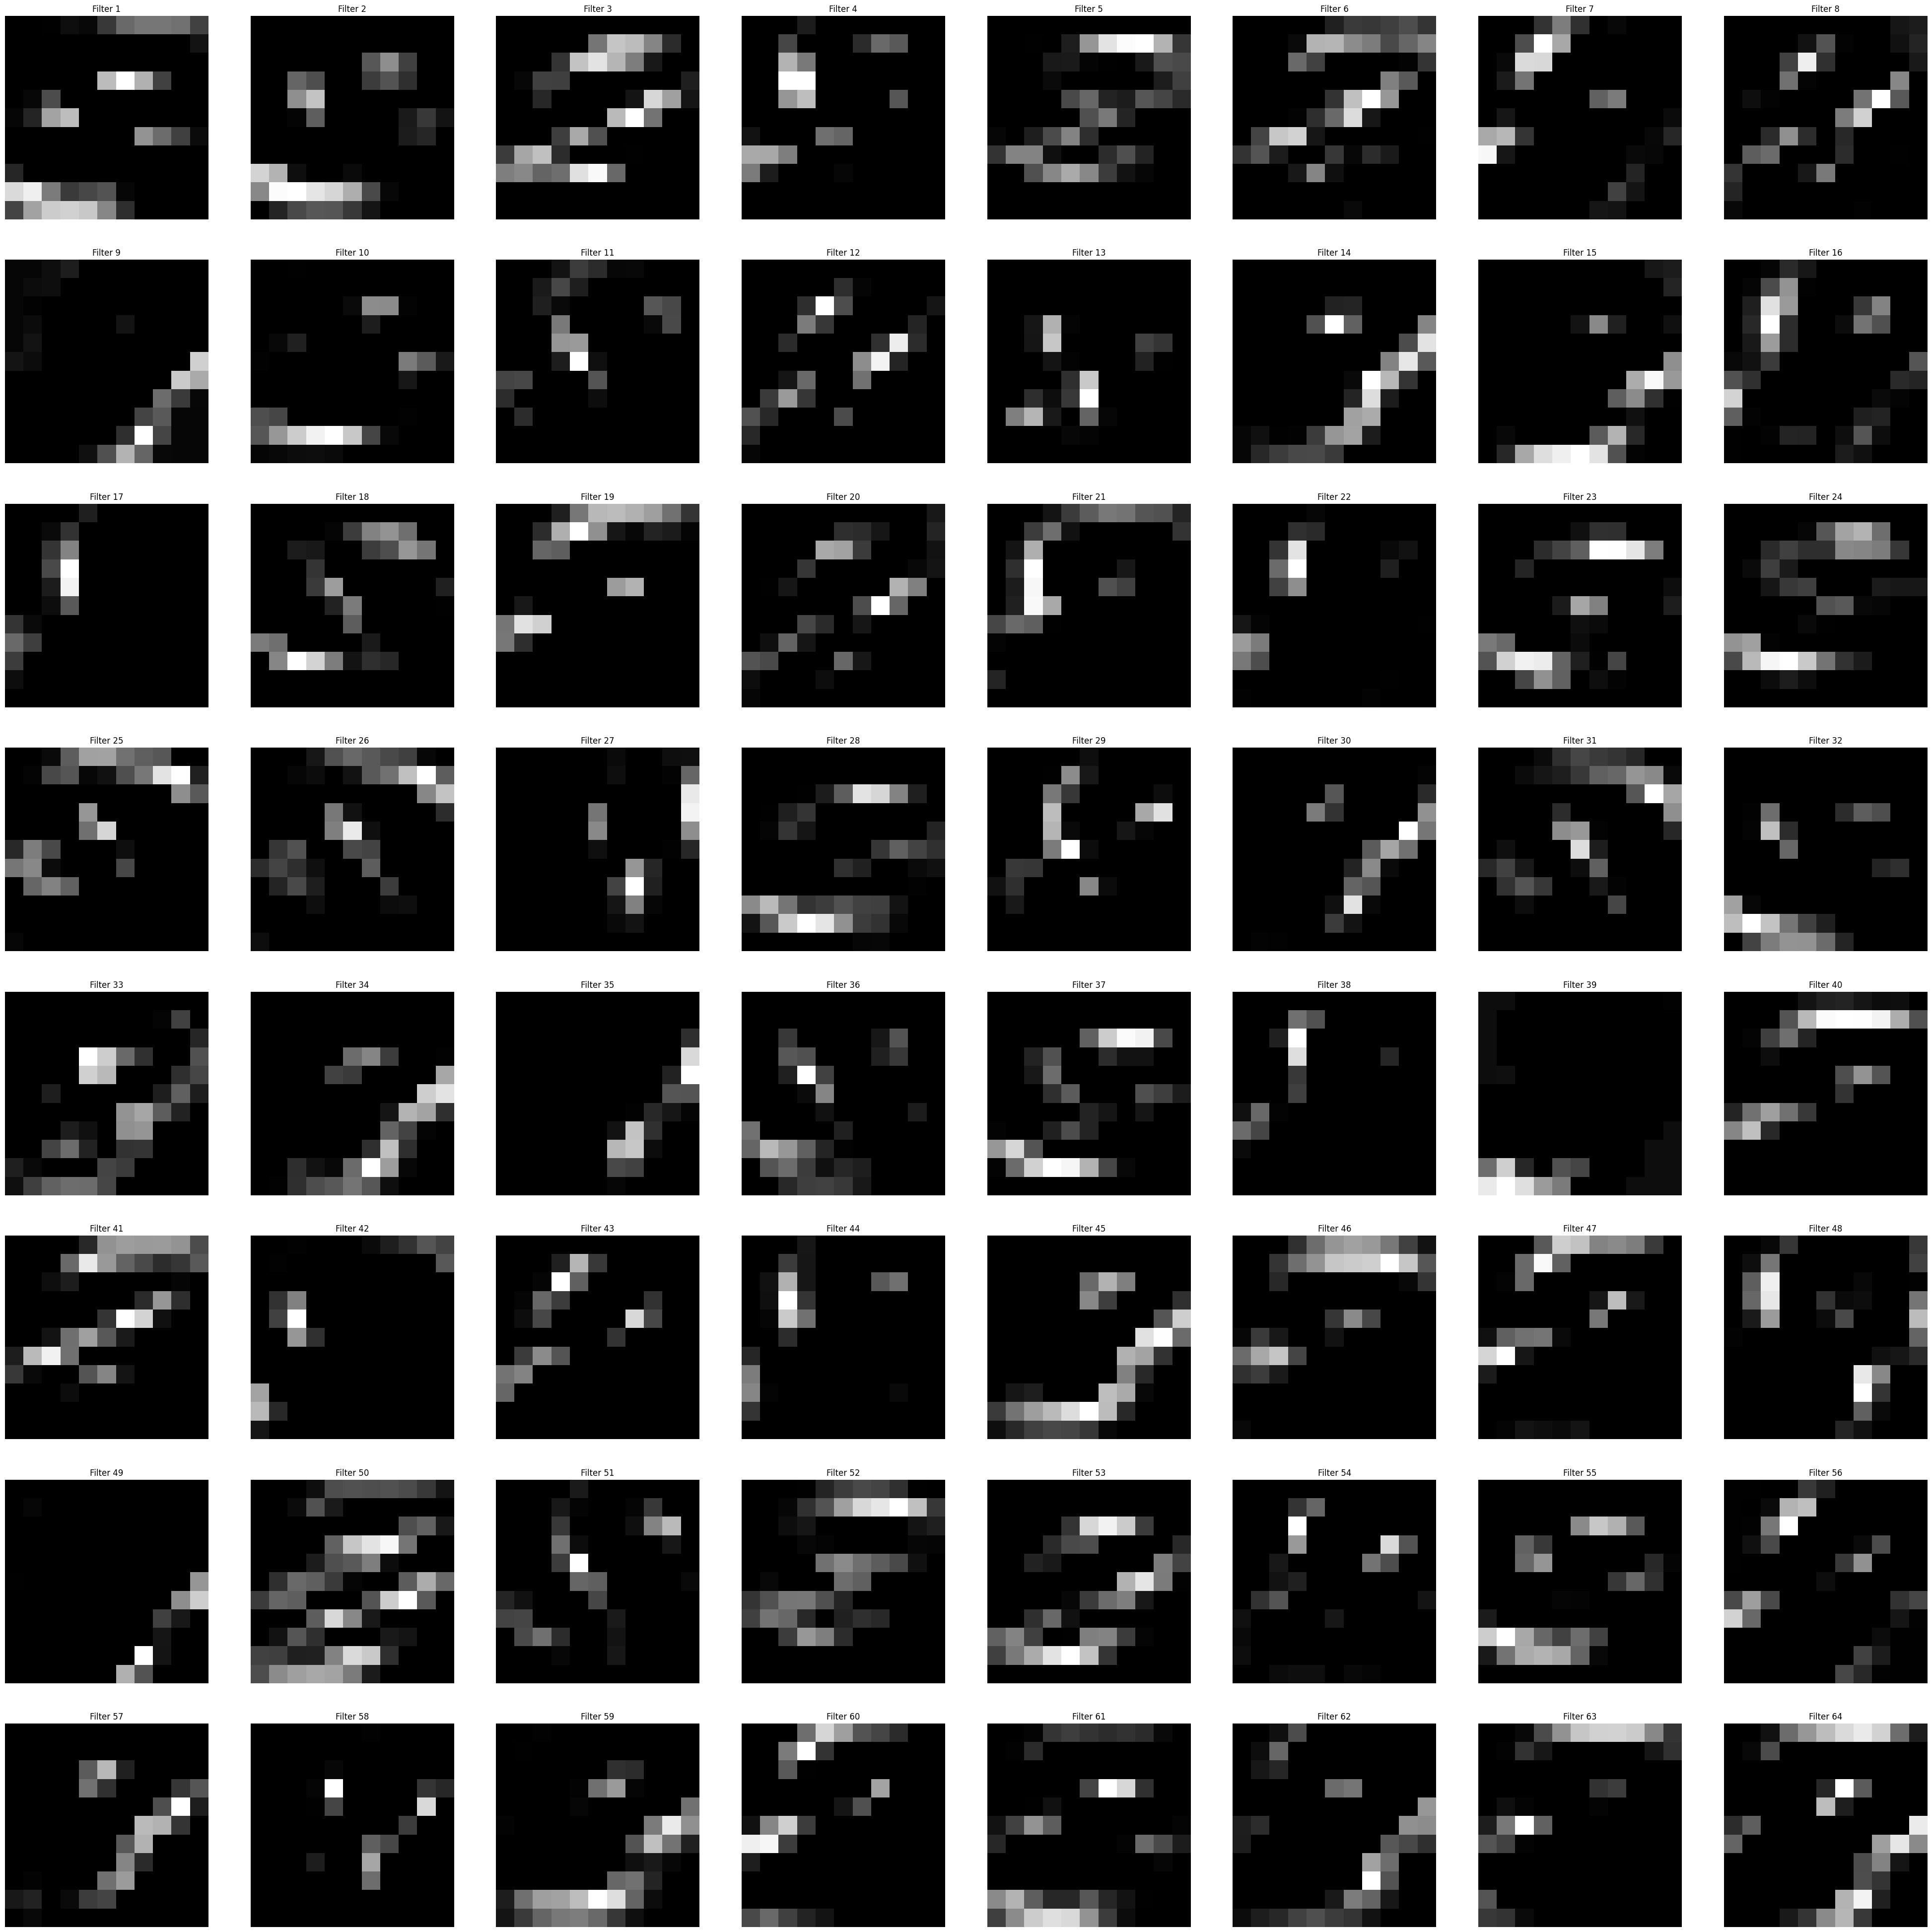

**It is now clearly visible that the each filter is extracting a particular feature.**